In [1]:
# Señal EEG registrada con el BITalino al momento de realizar una tarea congnitiva

In [2]:
# Importar librerías

import numpy as np
import matplotlib.pyplot as plt
import re
import pywt

# Cargar archivo EEG

r = open("eeg.txt","r")  
raw_data = r.readlines()[1]
r.close()

FileNotFoundError: [Errno 2] No such file or directory: 'eeg.txt'

In [ ]:
# Extraer frecuencia de muestreo con regex
x = re.findall("[0-5][0-9][0-9]\d", raw_data)[0]
Fs = float(x)             # Frecuencia de muestreo
Ts = 1/Fs                 # Periodo de muestreo

print(f"Fs = {Fs} Hz\nTs = {Ts} s")

Fs = 1000.0 Hz
Ts = 0.001 s


In [ ]:
# Leer los datos
a_r = np.genfromtxt("eeg.txt", delimiter="\t", skip_header=3)


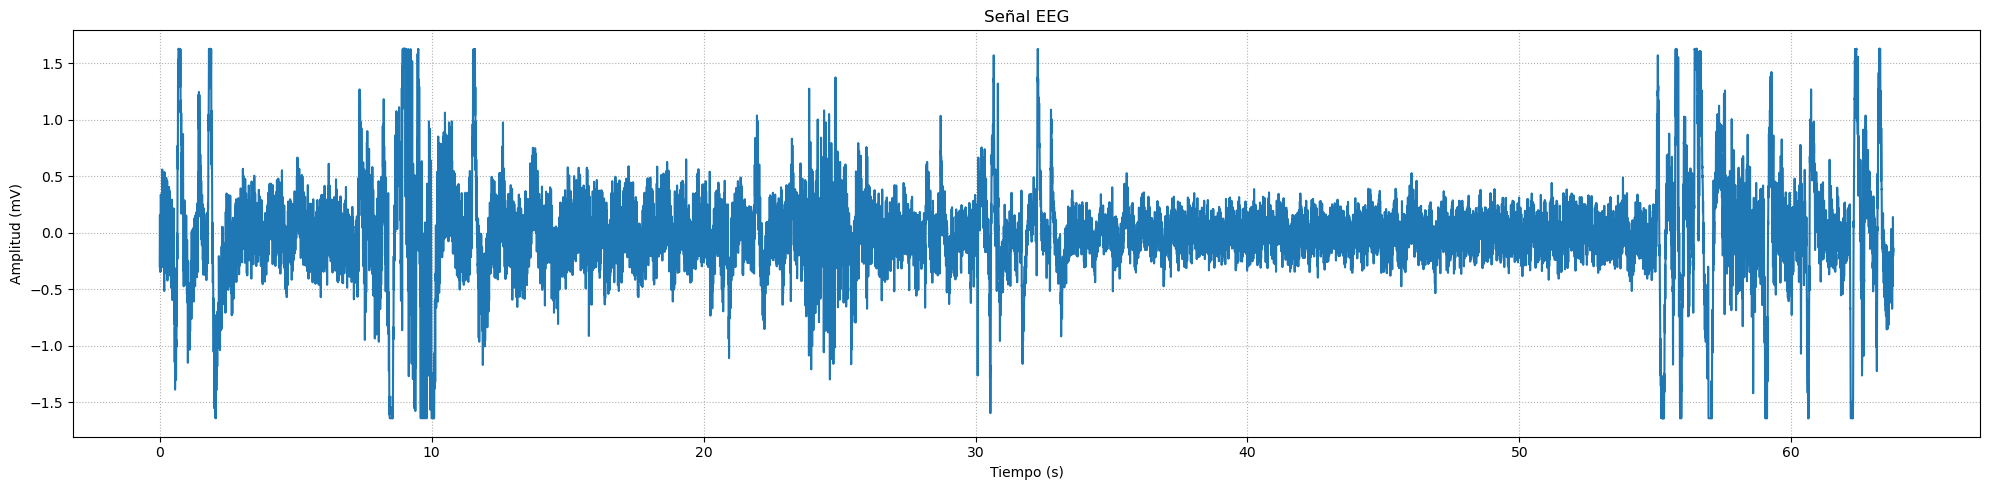

In [ ]:
import scipy.signal as signal

bits = 10
volt_range = 3.28  # (-1.64; 1.64) mV

y_1 = (a_r[: ,-2] * volt_range/(2**bits - 1)) 
y_1 = y_1 - np.mean(y_1) 
t_1 = np.arange(0, len(y_1)*Ts, Ts) 

plt.figure(figsize=(20, 5))

plt.plot(t_1, y_1, label="señal") # Señal completa
plt.title("Señal EEG")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud (mV)")
fig = plt.gcf()
fig.set_facecolor('white')
plt.tight_layout()
plt.savefig('eeg.png', transparent=False, )
plt.show()


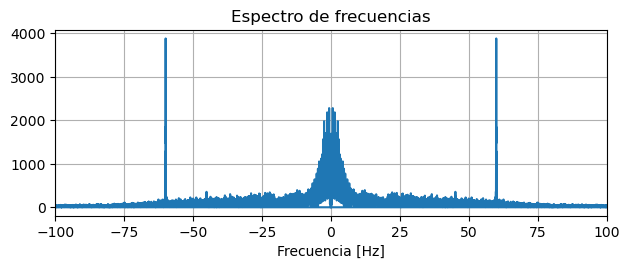

In [ ]:
# Calcular la DFT
X = np.fft.fft(y_1)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(y_1), 1/Fs)

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(X))
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia [Hz]')
plt.grid()

# Establecer límites en el eje x
plt.xlim([-100, 100])

plt.tight_layout()
plt.show()

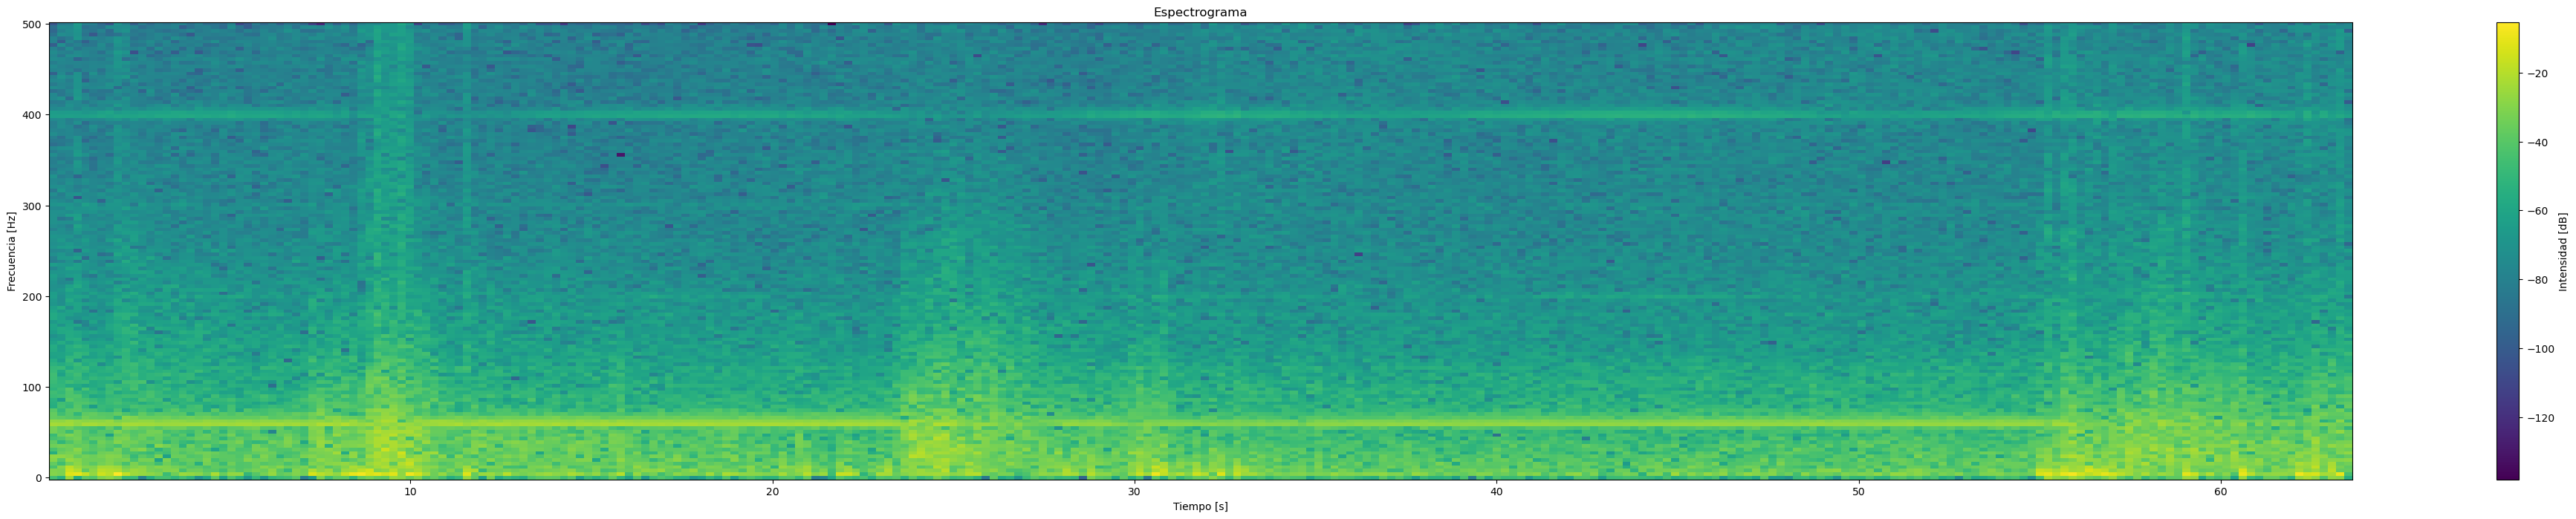

In [ ]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Calcular la STFT
f, t, Sxx = spectrogram(y_1, Fs)
plt.figure(figsize=(50, 8))

# Visualizar el espectrograma
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Usamos escala logarítmica para mejor visualización
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma')
plt.colorbar(label='Intensidad [dB]')
plt.show()

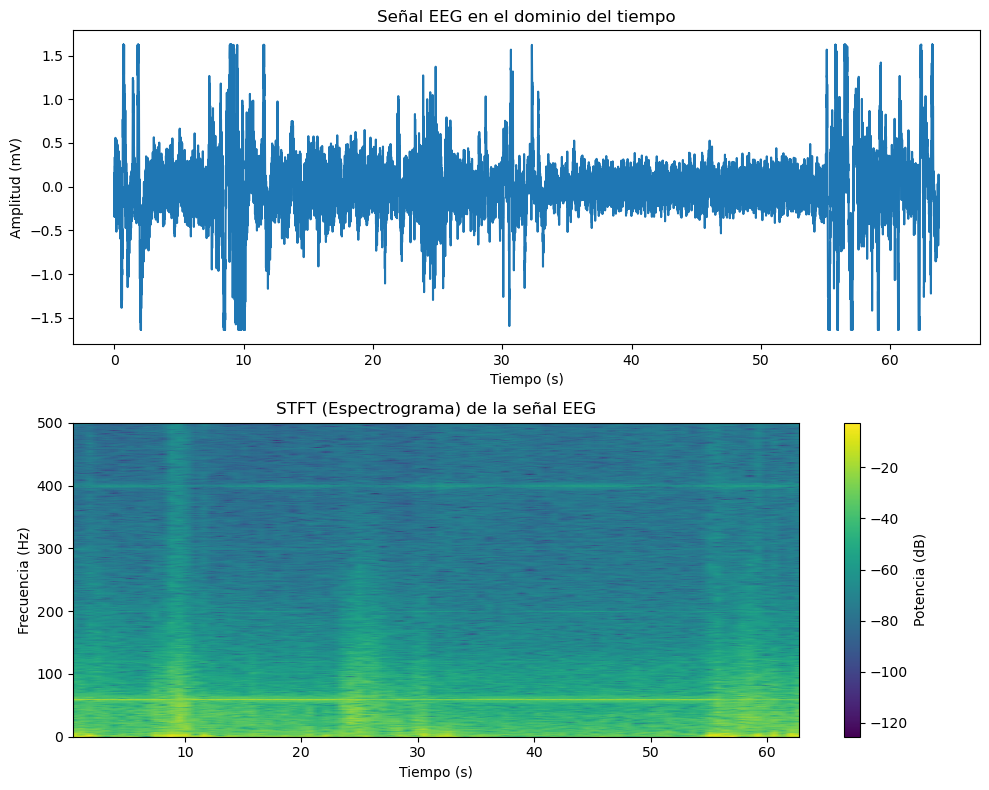

In [ ]:
from scipy.signal import spectrogram

# Calcular la STFT de tu señal EMG real
frequencies, times, Sxx = spectrogram(y_1, fs=Fs, nperseg=800)

# Graficar la señal y su espectrograma
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t_1, y_1)
plt.title('Señal EEG en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('STFT (Espectrograma) de la señal EEG')
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (s)')
plt.colorbar(label='Potencia (dB)')

plt.tight_layout()
plt.show()


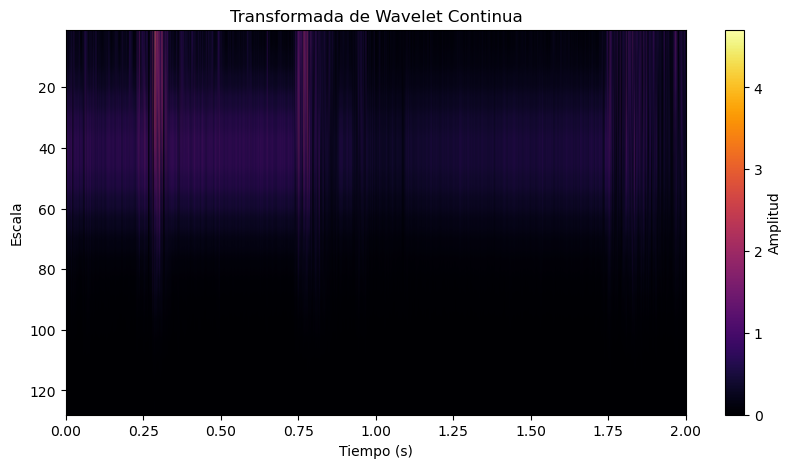

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Definir la escala y la frecuencia central de la wavelet de Morlet
escala = np.arange(1, 20)


# Realizar la transformada de wavelet continua
coeficientes, frecuencias = pywt.cwt(y_1, escala, 'morl', sampling_period=Ts)


# Graficar los coeficientes de la transformada de wavelet
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coeficientes), extent=[0, 2, 1, 128], aspect='auto', cmap='inferno')
plt.colorbar(label='Amplitud')
plt.title('Transformada de Wavelet Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Escala')
plt.gca().invert_yaxis()
plt.show()

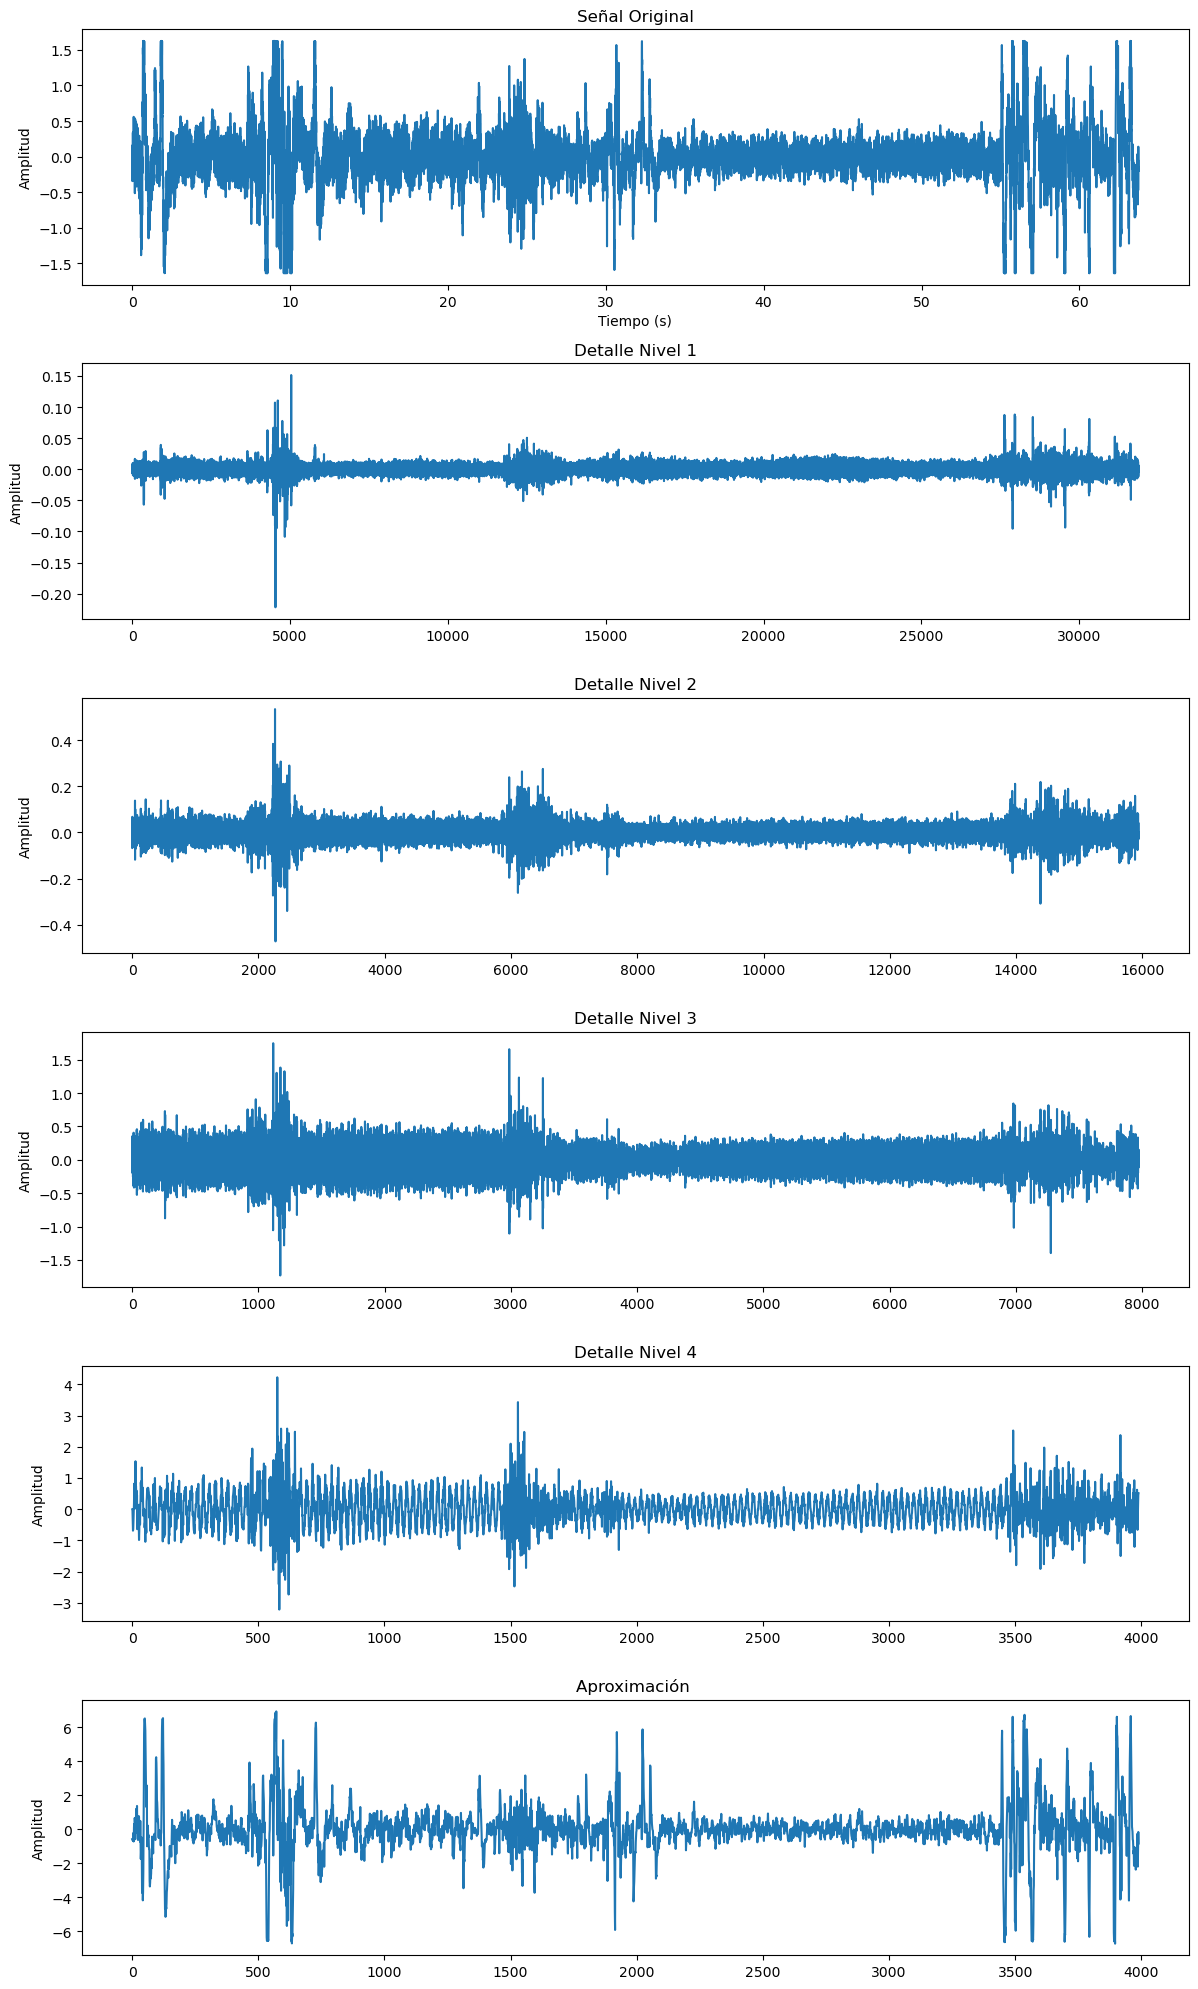

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

x = y_1 

# Aplicar la DWT
niveles = 4
coeficientes = pywt.wavedec(x, 'db4', level=niveles)
coef_filtrados = coeficientes.copy()

for i in range(1, len(coef_filtrados)):
    coef_filtrados[i] = np.zeros_like(coef_filtrados[i])


# Graficar la señal original y los coeficientes de detalle y de aproximación
plt.figure(figsize=(12, 20))

# Graficar la señal original
plt.subplot(niveles + 2, 1, 1)
plt.plot(t_1, x)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar los coeficientes de detalle en orden ascendente (del nivel 1 al 4)
for i in range(1, niveles + 1):
    plt.subplot(niveles + 2, 1, i + 1)
    plt.plot(coeficientes[niveles - i + 1])
    plt.title(f'Detalle Nivel {i}')
    plt.ylabel('Amplitud')

# Graficar el coeficiente de aproximación al final
plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación ')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

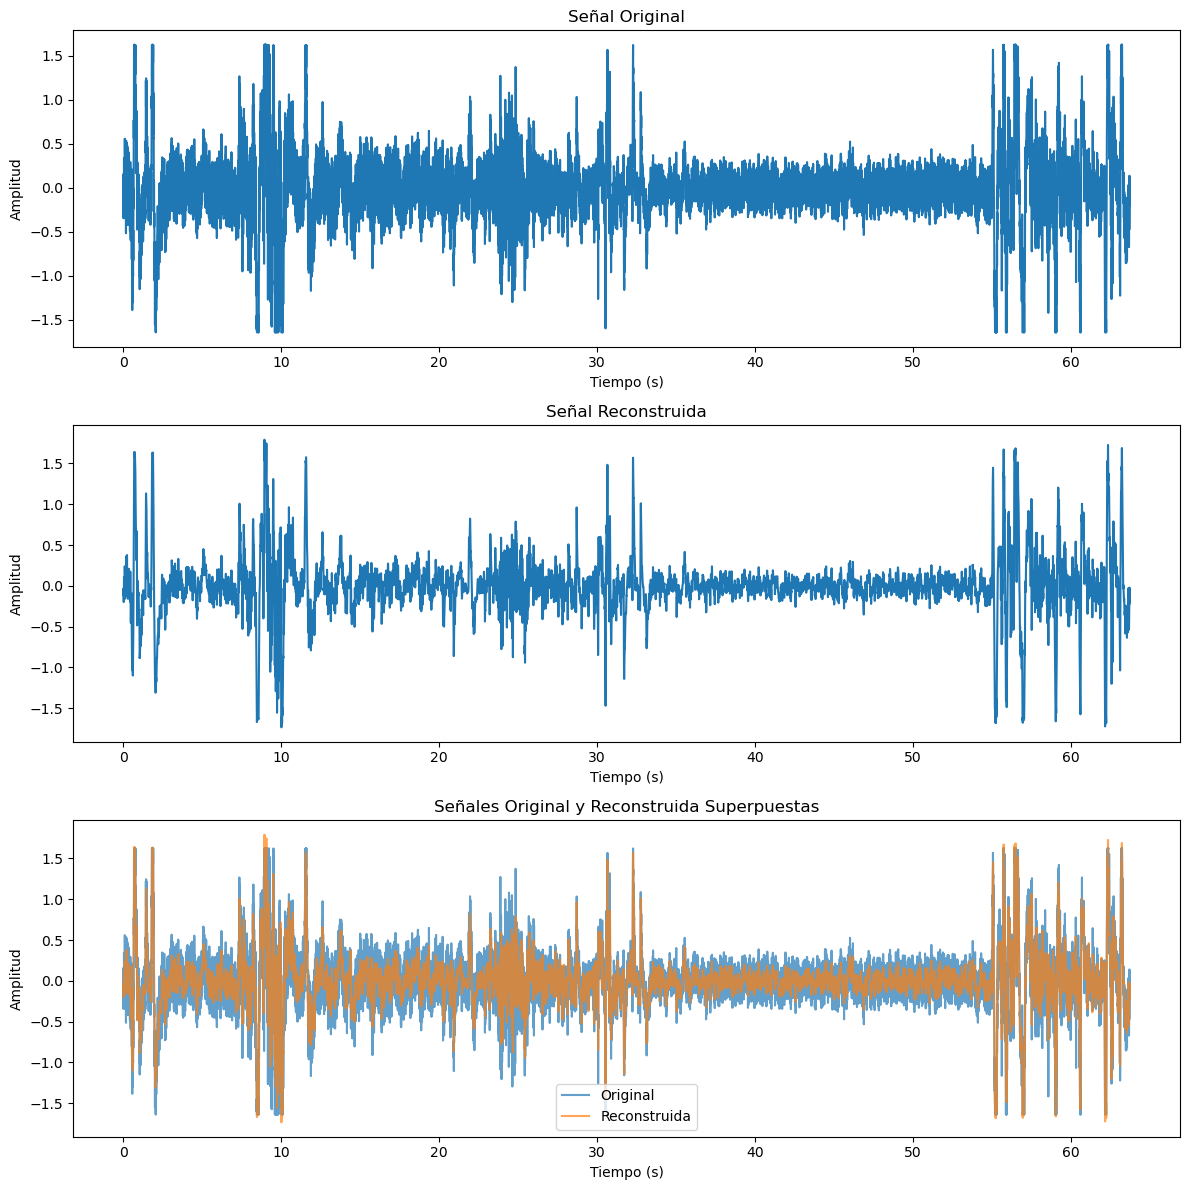

In [ ]:
# Reconstruir la señal filtrada/reconstruida
x_rec = pywt.waverec(coef_filtrados, 'db4')
x_rec = x_rec[:len(x)]


# Crear la figura con tres subplots verticales
plt.figure(figsize=(12, 12))

# Graficar la señal original
plt.subplot(3, 1, 1)  
plt.plot(t_1, x)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la señal reconstruida
plt.subplot(3, 1, 2) 
plt.plot(t_1[:len(x_rec)], x_rec)
plt.title('Señal Reconstruida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar ambas señales superpuestas
plt.subplot(3, 1, 3)  
plt.plot(t_1, x, label='Original', alpha=0.7)
plt.plot(t_1, x_rec, label='Reconstruida', alpha=0.7)
plt.title('Señales Original y Reconstruida Superpuestas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


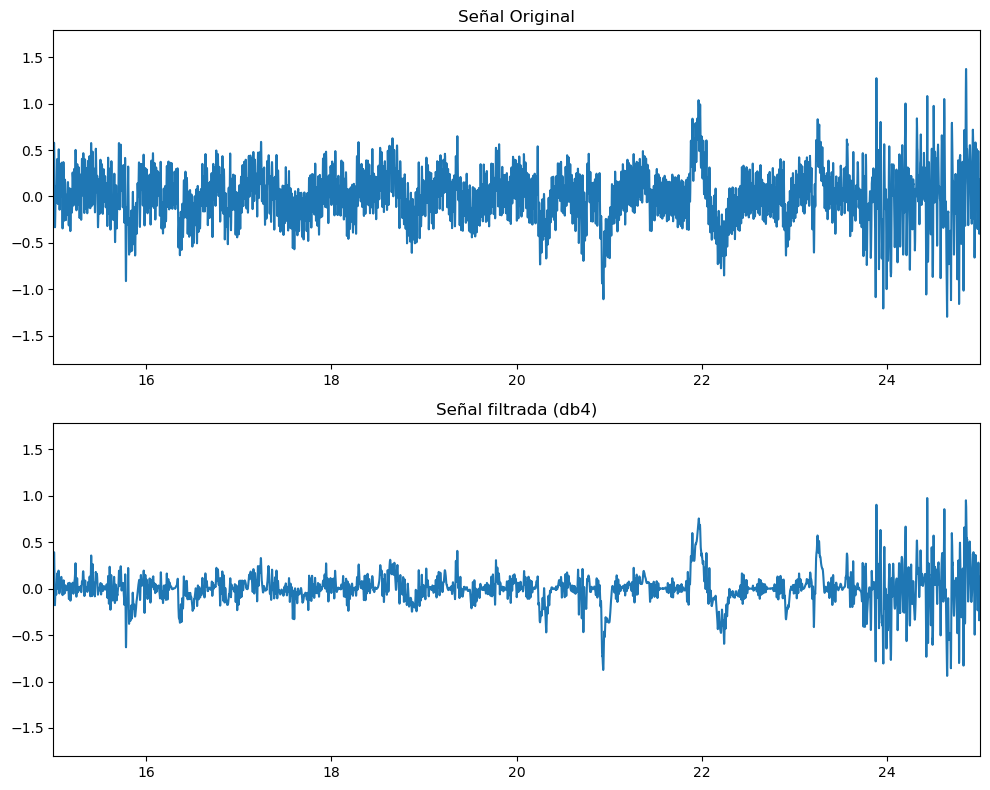

In [ ]:
import pywt
import matplotlib.pyplot as plt

# Realizar la descomposición en wavelets
coeffs = pywt.wavedec(y_1, 'db4', level=4)

# Establecer un umbral para el denoising
umbral = 0.4

# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'db4')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.xlim(15,25)
plt.plot(t_1, y_1, label='Señal Original')
plt.title('Señal Original')

plt.subplot(2, 1, 2)
plt.plot(t_1, senal_denoised, label='Señal Denoised')
plt.xlim(15,25)
plt.title('Señal filtrada (db4)')

plt.tight_layout()
plt.show()

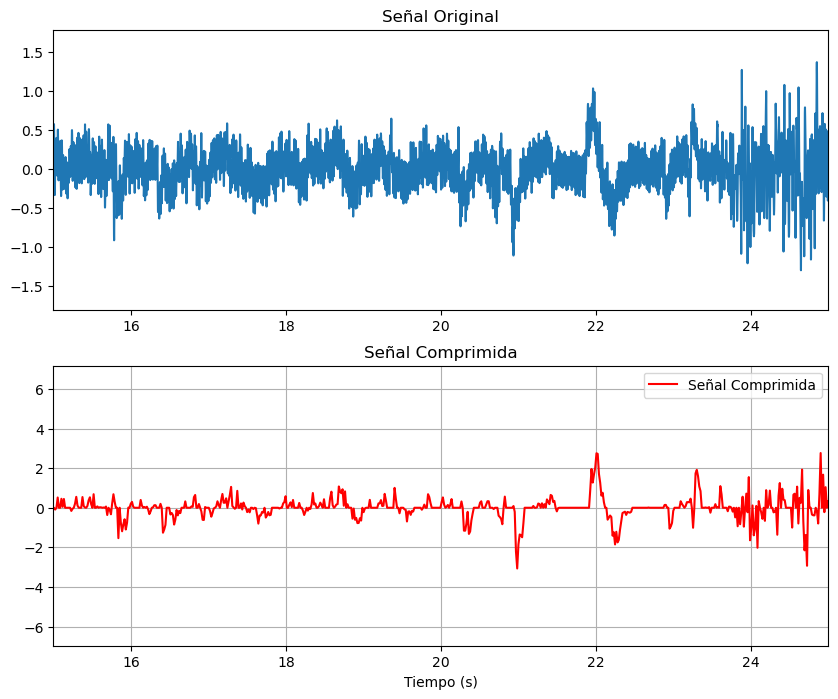

In [ ]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Obtener los coeficientes de aproximación
coef_aproximacion = coeffs_umbral[0]

# Reconstruir la señal comprimida
senal_comprimida = pywt.waverec([coef_aproximacion], 'db4')

# Obtener el tiempo correspondiente a los datos
t_2 = np.linspace(0, len(y_1)/Fs, len(senal_comprimida))  

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.xlim(15,25)
plt.plot(t_1, y_1, label='Señal Original')
plt.title('Señal Original')


plt.subplot(2, 1, 2)
plt.xlim(15,25)
plt.plot(t_2, senal_comprimida, label='Señal Comprimida', color='red')
plt.title('Señal Comprimida')
plt.xlabel('Tiempo (s)')

plt.legend()
plt.grid(True)
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20672\1537784830.py:24: RuntimeWarning: overflow encountered in square
  energia = np.sum(filtrada**2) / len(filtrada)  # energía promedio
c:\Users\USUARIO\anaconda3\envs\Filtros\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\USUARIO\anaconda3\envs\Filtros\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


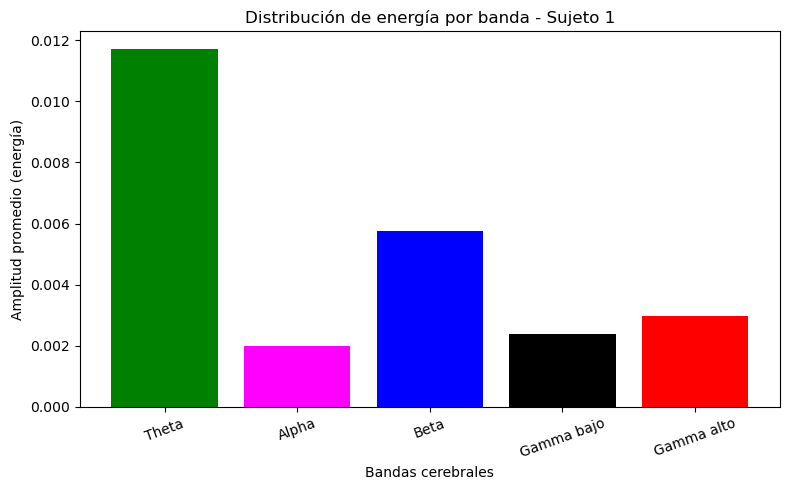

In [ ]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

# --- Filtro pasa banda ---
def bandpass_filter(signal, lowcut, highcut, fs):
    b, a = butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
    return filtfilt(b, a, signal)

# --- Definir las bandas cerebrales ---
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma bajo': (30, 45),
    'Gamma alto': (45, 100)
}

# --- Aplicar filtros y calcular amplitudes ---
amplitudes = []
for nombre, (low, high) in bands.items():
    filtrada = bandpass_filter(senal_denoised, low, high, Fs)
    energia = np.sum(filtrada**2) / len(filtrada)  # energía promedio
    amplitudes.append(energia)

# --- Graficar ---
plt.figure(figsize=(8, 5))
plt.bar(bands.keys(), amplitudes, color=['cyan','green','magenta','blue','black','red'])
plt.title('Distribución de energía por banda - Sujeto 1')
plt.xlabel('Bandas cerebrales')
plt.ylabel('Amplitud promedio (energía)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
